In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF
from output import format_for_submission

Text(0.5, 0, 'Output')

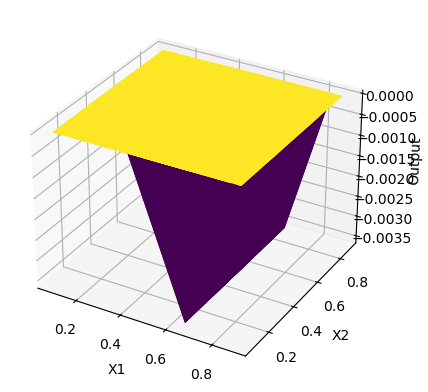

In [2]:
#mesh plot
ary1_in = np.load('../data/raw/initial_data/function_1/initial_inputs.npy')
ary1_out = np.load('../data/raw/initial_data/function_1/initial_outputs.npy')

x = ary1_in[:, 0]
y = ary1_in[:, 1]

X, Y = np.meshgrid(x, y)

# Reshape the output to fit the meshgrid layout for the surface plot
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = ary1_out[i]  


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Output')

In [3]:
#Output to CSV
interim_folder = '../data/interim'
for i in range(1,9):
    ary_in = np.load(f'../data/raw/initial_data/function_{i}/initial_inputs.npy')
    ary_out = np.load(f'../data/raw/initial_data/function_{i}/initial_outputs.npy')
    combined = np.append(ary_in, ary_out.reshape(-1,1), axis=1)
    np.savetxt(f'{interim_folder}/function_{i}.csv', combined, delimiter=',')



[0.00367 0.9999 ]


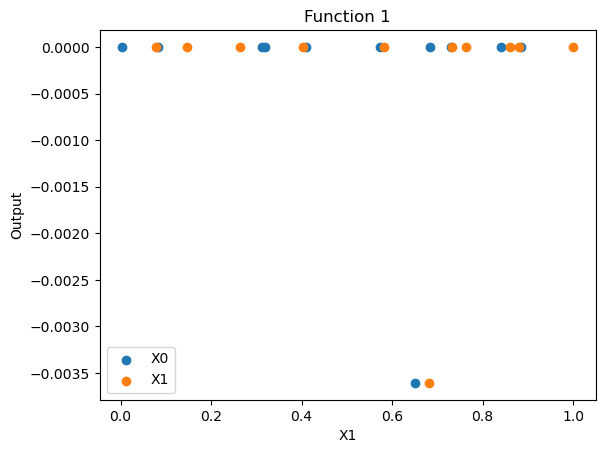

[0.00367 0.9999 ]


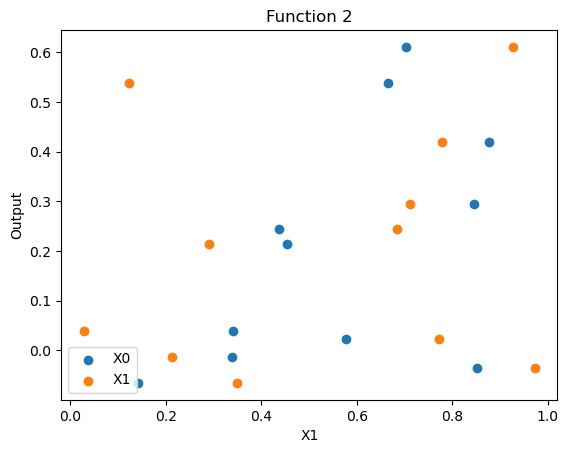

[0.00367 0.9999 ]


KeyboardInterrupt: 

In [37]:
#Individual plot per function

def get_function_data(function_number):
    ary_in = np.load(f'../data/raw/initial_data/function_{function_number}/initial_inputs.npy')
    ary_out = np.load(f'../data/raw/initial_data/function_{function_number}/initial_outputs.npy')

    week1_out = [0.0, -0.03634716524130564, -0.13995571712281177, -11.512791229057324, 351.7115420928652, -0.5971511450896173, 0.2910786825809617, 8.618272750952901]
    week1_in = [np.array([0.00367, 0.9999 ]), 
                np.array([0.851999, 0.973204]), 
                np.array([0.747032, 0.28413 , 0.226329]), 
                np.array([0.169128, 0.756136, 0.275457, 0.528761]), 
                np.array([0.439601, 0.772709, 0.376277, 0.933269]), 
                np.array([0.232204, 0.132714, 0.53824 , 0.760706, 0.075595]), 
                np.array([0.476821, 0.248196, 0.242816, 0.576157, 0.162416, 0.290926]), 
                np.array([0.221603, 0.703755, 0.674607, 0.130295, 0.376739, 0.669444, 0.136655, 0.061316])]    
    
    print(week1_in[0])

    ary_out=np.append(ary_out, week1_out[function_number-1])
    ary_in=np.vstack((ary_in, week1_in[function_number-1]))
    
    return ary_in, ary_out

for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    dimensions = ary_in.shape[1]
    fig = plt.figure()
    for x in range(0, dimensions):
        plt.scatter(ary_in[:, x], ary_out, label=f'X{x}')
        plt.xlabel(f'X{x}')
        plt.ylabel('Output')
        
        #plt.savefig(f'../reports/figures/function_{i}_X{x}_vs_output.png')
    plt.title(f'Function {i}')    
    plt.legend()
    plt.show()


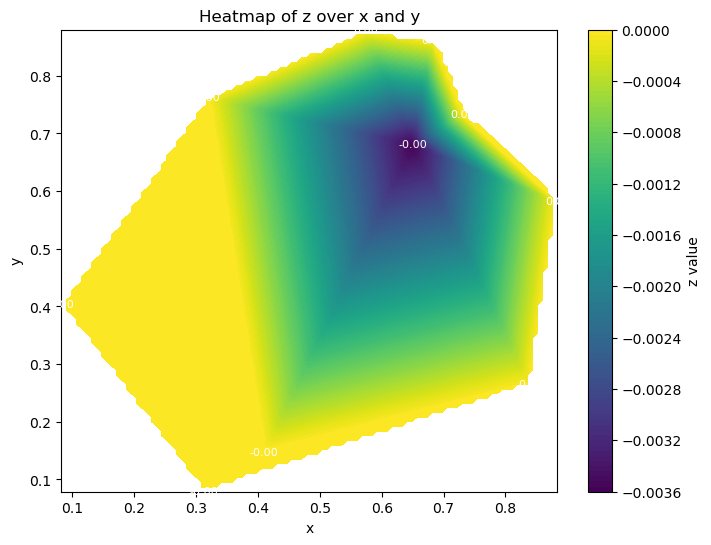

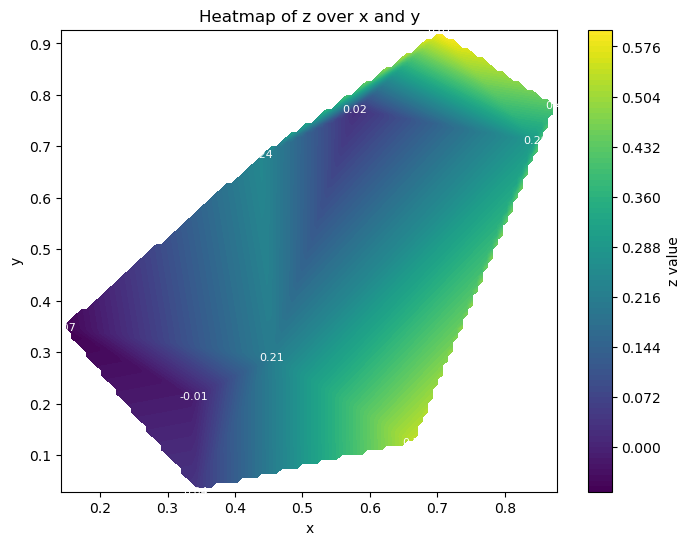

In [28]:
from scipy.interpolate import griddata
for i in range(1,3): #heatmaps of 2d functions
    ary_in, ary_out = get_function_data(i)
    x = ary_in[:, 0]
    y = ary_in[:, 1]
    z = ary_out

    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), 100),
        np.linspace(y.min(), y.max(), 100)
    )

    # Interpolate the z values onto the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    plt.colorbar(label='z value')
    for xi, yi, zi in zip(x, y, z):
        plt.text(xi, yi, f'{zi:.2f}', color='white', fontsize=8, ha='center', va='center')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Heatmap of z over x and y')
    plt.show()

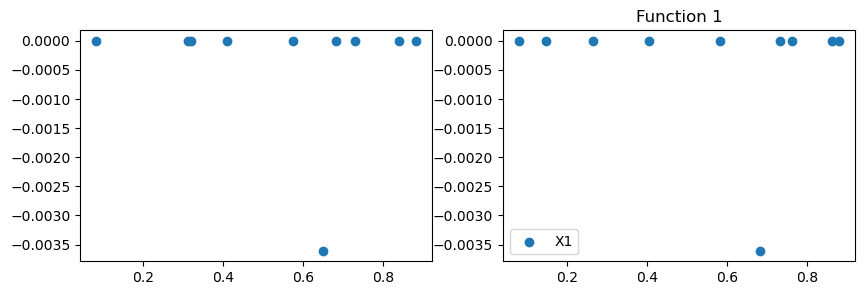

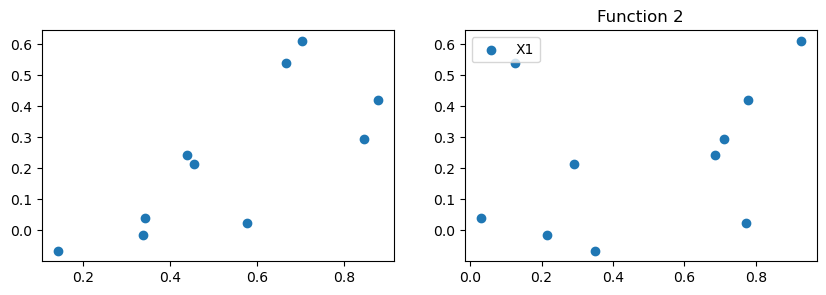

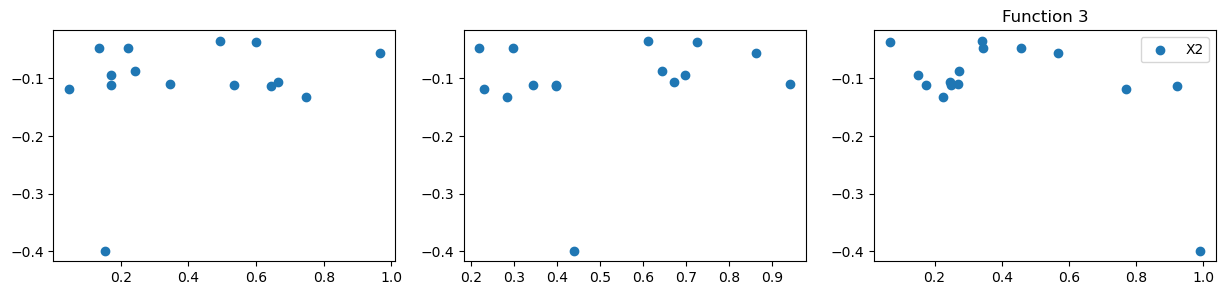

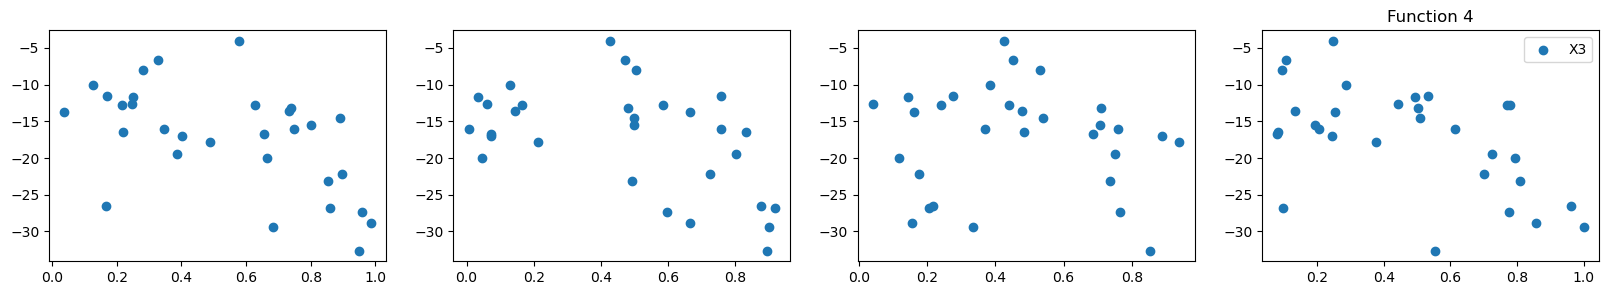

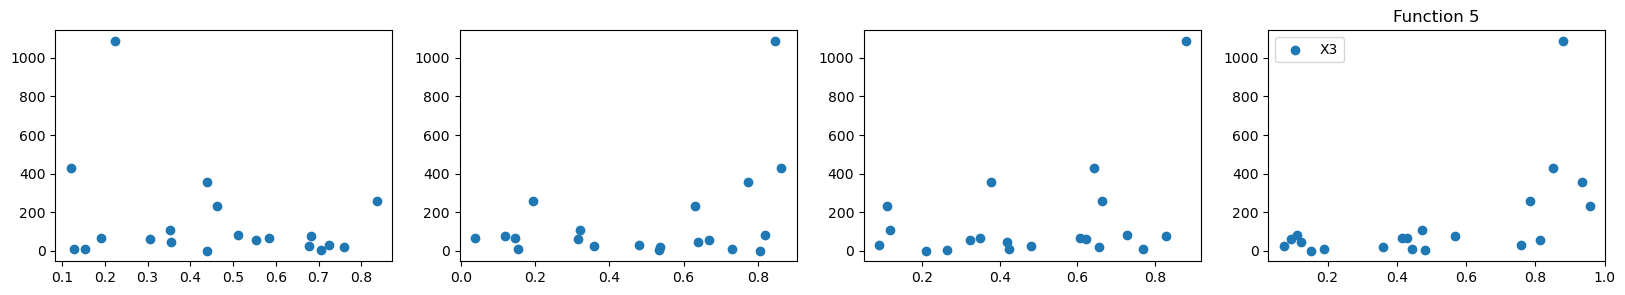

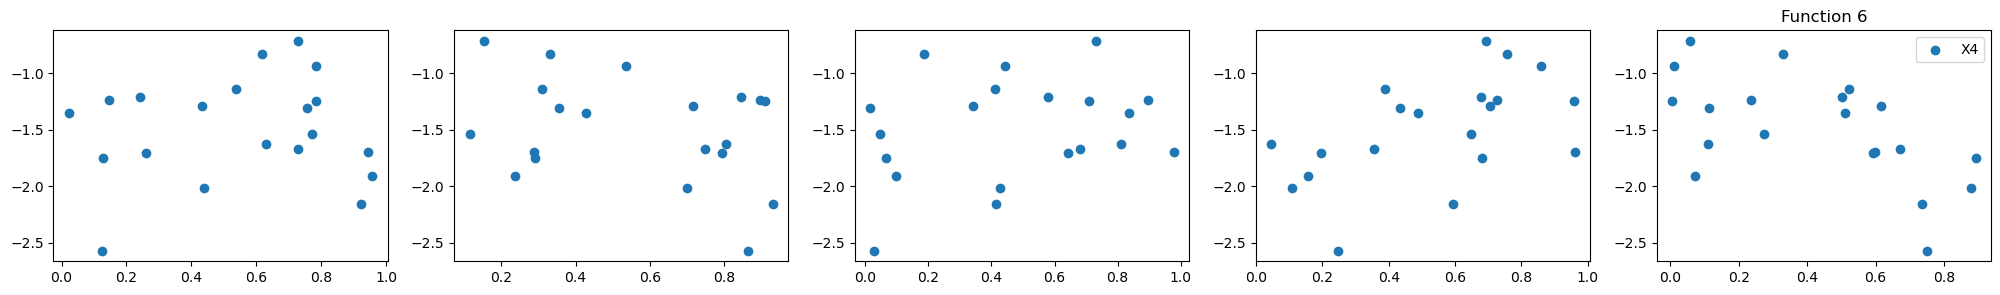

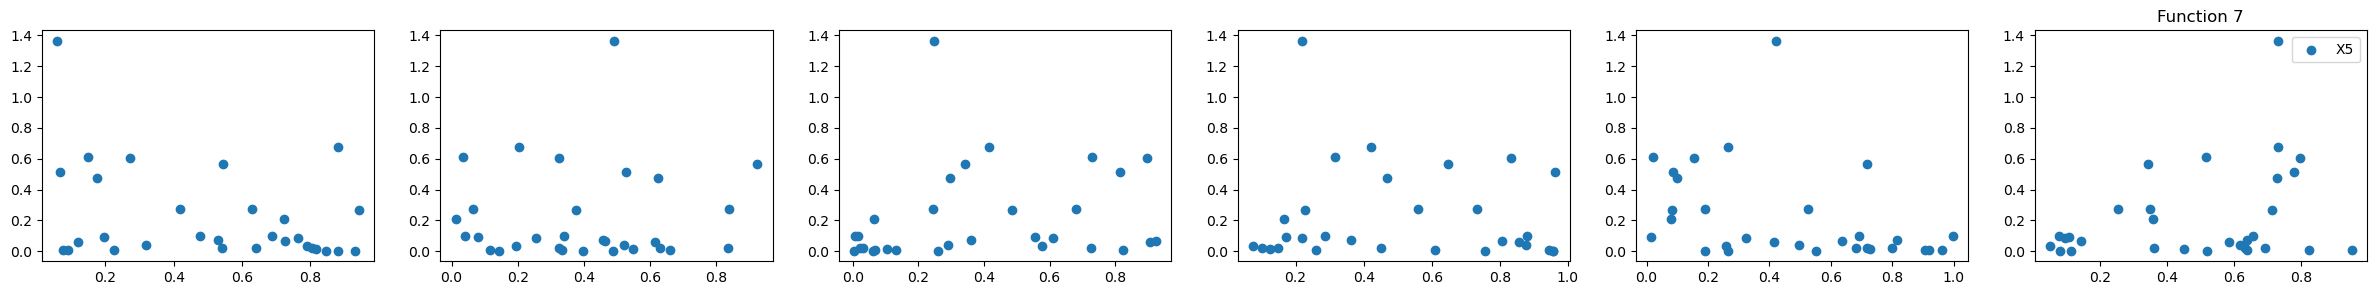

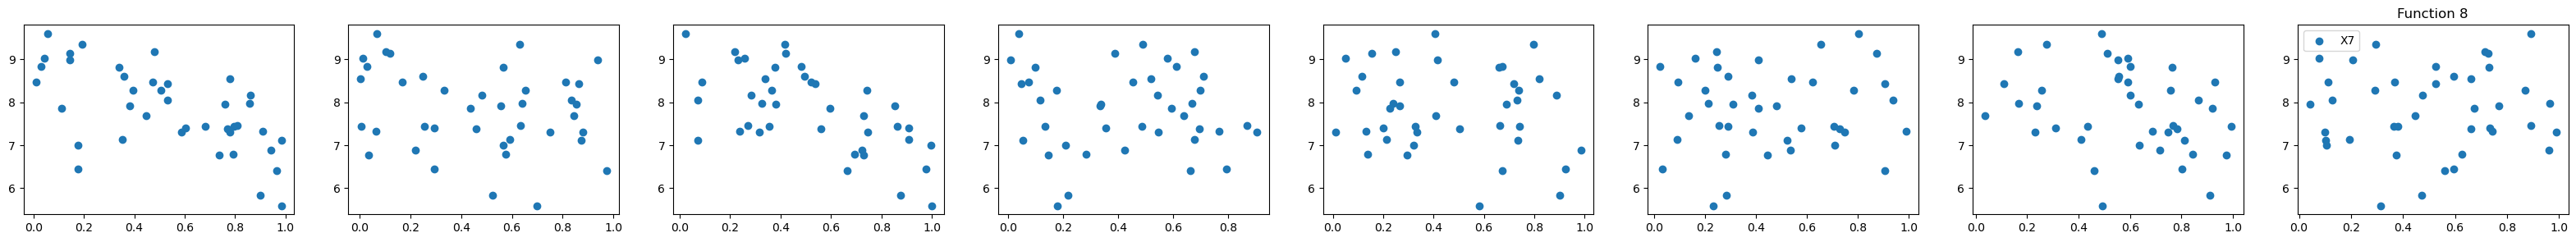

In [ ]:



#Individual plot per parameter
for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    dimensions = ary_in.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=dimensions, figsize=(5 * dimensions, 3))
    
    #fig.tight_layout()
    for x in range(0, dimensions):
        # sub = fig.add_subplot(1, dimensions, x+1)
        #sub.
        axes[x].scatter(ary_in[:, x], ary_out, label=f'X{x}')
        #sub.scatter(ary_in[:, x], ary_out, label=f'X{x}')
        #sub.xlabel(f'X{x}')
        #sub.ylabel('Output')
        # sub.title = f'Function {i} input {x}'
        #plt.savefig(f'../reports/figures/function_{i}_X{x}_vs_output.png')
    plt.title(f'Function {i}')    
    plt.legend()
    plt.show()

In [6]:
def create_n_dimensional_grid(dimensions, num_points = 1001):
    """
    Create a grid for n dimensions.
    
    Parameters:
    - dimensions: number of dimensions (n)
    - num_points: number of points along each axis
    
    Returns:
    - A 2D array of shape (n_points, n_dimensions) where each row is a point in the n-dimensional space.
    """
    # Create a list of n-dimensional grids in range 0-1
    grids = [np.linspace(0, 1, num_points) for _ in range(dimensions)]
    
    # Create the n-dimensional meshgrid and then stack the ravel-ed grids together
    meshgrid = np.meshgrid(*grids)
    
    # Flatten the meshgrid and stack it together to get a 2D array of shape (n_points, n_dimensions)
    X_grid = np.vstack([g.ravel() for g in meshgrid]).T
    
    return X_grid

In [10]:
# Gaussian Process Acquisition Function (Upper Confidence Bound)
def ucb_acquisition(x, model, kappa=2.0):
    """
    UCB acquisition function for Bayesian Optimization.
    
    Parameters:
    - x: Point at which to evaluate the acquisition function.
    - model: GaussianProcessRegressor model.
    - kappa: Controls the exploration vs exploitation trade-off.
    
    Returns:
    - UCB acquisition value at point x.
    """
    # Predict the mean and standard deviation
    mean, std = model.predict(x.reshape(1, -1), return_std=True)
    
    # UCB acquisition function
    return mean + kappa * std

def lcb_acquisition(x, model, kappa=2.0):
    mean, std = model.predict(x.reshape(1, -1), return_std=True)
    return mean - kappa * std

# Function to suggest the next query point
def suggest_next_point(bounds, function_number, model, kappa=2.0):
    """
    Suggest the next point to query using Bayesian Optimization with Gaussian Process.
    
    Parameters:
    - X_existing: Array of input points already observed (n_samples, n_features).
    - Y_existing: Array of corresponding output values (n_samples,).
    - bounds: Bounds for each input dimension (n_features, 2).
    - model: Pre-trained GaussianProcessRegressor model (if available).
    - kappa: Exploration-exploitation trade-off parameter for UCB.
    
    Returns:
    - Next input point to query.
    """

    # Define the acquisition function to minimize (negative UCB)
    def acquisition_wrapper(x):
        if function_number in [1,2,5,7,8]: #maximise
            return -ucb_acquisition(x, model, kappa)
        elif function_number == 4: # minimise
            return lcb_acquisition(x, model, kappa) 
        else:
            # closest to 0. Get highest abs of (ucb or lcb) and minimize that
            return max(abs(lcb_acquisition(x, model, kappa)), abs(ucb_acquisition(x, model, kappa)))  # Minimize the negative of the acquisition function
    
    # Minimize the acquisition function to find the next point
    start_point = np.random.uniform(bounds[:, 0], bounds[:, 1])
    #print (f"Start point = {start_point}")
    res = optimize.minimize(acquisition_wrapper, start_point, bounds=bounds, method='L-BFGS-B')
    
    # Return the next query point
    return res.x

def at_bound(x):
    if (0 in x) or (1 in x):
        return True
    return False

# Suggest next points for each function
for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    in_bounds = np.array([[0.0, 1.0]] * ary_in.shape[1])

    # fit gaussian process surrogate function
    kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
    #kernel = RationalQuadratic(length_scale=0.1, alpha=1.0)

    noise_assumption = 1e-1 # noise assumption, a hyper-parameter
    surrogate = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)

    surrogate.fit(ary_in, ary_out)

    next_point = [0]
    while at_bound(next_point):
        next_point = suggest_next_point(in_bounds, i, surrogate, kappa=2)
        #print(f"Function {i} Considering next point: {next_point})")
    submit = format_for_submission(next_point)
    print (f"Function {i} Next point to submit: {submit}")    

Function 1 Next point to submit: 0.407378-0.459445
Function 2 Next point to submit: 0.237469-0.716214
Function 3 Next point to submit: 0.492534-0.611615-0.340303
Function 4 Next point to submit: 0.857622-0.916665-0.209079-0.099756
Function 5 Next point to submit: 0.687378-0.120595-0.824786-0.573199
Function 6 Next point to submit: 0.313410-0.094162-0.750722-0.858574-0.587180
Function 7 Next point to submit: 0.934259-0.486203-0.071703-0.545565-0.989146-0.483191
Function 8 Next point to submit: 0.250460-0.151539-0.878271-0.457134-0.903946-0.889016-0.806806-0.485614


In [43]:
#using skopt

from skopt import gp_minimize
from skopt.space import Real
from sklearn.gaussian_process.kernels import Matern


search_space = [
    Real(0.0, 1.0, name='x1'),
    Real(0.0, 1.0, name='x2')
]

ary_in, ary_out = get_function_data(1)

print("Shape of ary_in:", ary_in.shape)

# Check if ary_in dimensions match the search space
assert ary_in.shape[1] == len(search_space), (
    f"Input dimensions ({ary_in.shape[1]}) do not match the search space dimensions ({len(search_space)})."
)

kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

gp.fit(ary_in, ary_out)

noise_level = 0.1

def surrogate_function(inputs):
    
    # Predict using the Gaussian Process surrogate model
    y_pred, stdev = gp.predict(np.atleast_2d(inputs), return_std=True)
    return y_pred[0]  # Minimizing

# acq_func, kappa
minimise_params = [
    ["LCB", 500], #f1 - maximise exploration
    ]

res = gp_minimize(
    func=surrogate_function,   # The objective function to minimize
    dimensions=search_space,  # The search space
    #acq_func="EI",           # Acquisition function (Expected Improvement)
    acq_func="LCB",
    kappa= 500.0,    # High kappa favors exploration
    n_calls=ary_in.shape[0] * 2,               # Total number of queries allowed (including initial samples)
    x0=[list(x) for x in ary_in],             # Initial input samples
    y0=ary_out # Initial output samples (negated for maximization)
)

print("Best input values found:", res.x)
print("Best output value observed:", res.fun)

# Suggest the next point to evaluate
suggested = np.array(res.x_iters[-1])
print("Suggested next inputs to try:", format_for_submission(suggested))



[0.00367 0.9999 ]
Shape of ary_in: (11, 2)
Best input values found: [0.519556136162789, 0.40075146744762236]
Best output value observed: -0.007423985579180226
Suggested next inputs to try: 0.071887-0.860754
